<a href="https://colab.research.google.com/github/eugeneitmm2002/SKM_task/blob/main/%22LAB_33_SKM_SHUIN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 33. Минимизация методом квадратичной интерполяции

Реализовать метод квадратичной интерполяции для нахождения минимума функции, заданной на отрезке.
Привести примеры функций, для которых процесс а) сходится сверхлинейно; б) сходится с линейной скоростью; в) не сходится. 
Ваша программа должна строить графики этих функций, выдавать найденную точку минимума и значение функции в ней и количество вычислений значений функции.

**Шаг 1:** Первым делом подключаем нужные нам для реализации задачи библиотеки.

In [1]:
from math import exp
import matplotlib.pyplot as plt
%matplotlib inline

**Шаг 2:** Ниже представлены функции, с которыми предстоит работать.

In [2]:
def f(x) -> float:
  return 2 * x**2 - exp(x)

In [2]:
def f(x) -> float:
  return 2 * x**2 + exp(x)

In [2]:
def f(x) -> float:
  return -x**2 + 2*x +3

**Шаг 3** :Следующие 2 функции являются вспомогательными.

In [3]:
def tmpF(xi, xj, xk) -> float:
  return (xi - xj) * f(xk)

In [4]:
def tmpF2(xi, xj, xk) -> float:
  return (xi**2 - xj**2) * f(xk)

**Шаг 4** : Функция нахождения минимума в точке + подсчет количества итераций

In [5]:
def funMin(x1, x2, x3, dx, e) -> list:
  Fmin = min(f(x1), f(x2), f(x3))
  x_ = 0.5 * (tmpF2(x2, x3, x1) + tmpF2(x3, x1, x2) + tmpF2(x1, x2, x3)) / (tmpF(x2, x3, x1) + tmpF(x3, x1, x2) + tmpF(x1, x2, x3))
  if (abs((Fmin - f(x_)) / f(x_)) < e):
    res = [1, x1, Fmin]
    if (f(x2) == Fmin):
      res[1] = x2
    elif (f(x3) == Fmin):
      res[1] = x3
    return res
  x = sorted([x_, x1, x2, x3])
  y = [f(i) for i in x]
  if y[0] == min(y) or y[1] == min(y):
    res = funMin(x[0], x[1], x[2], dx, e)
  else:
    res = funMin(x[1], x[2], x[3], dx, e)
  res[0] += 1
  return res
  

**Шаг 5** : Лямбда-функция для вещественных чисел (оставляет 3 цифры после запятой)

In [6]:
toFixed = lambda x: float('{:.3f}'.format(x))

**Шаг 6** : Функция отрисовки графика и отображения минимальной точки

In [7]:
def draw(x0, y0):
  x = []
  y = []
  for i in range(100):
    x.append(x0 - 5 + i / 10)
    y.append(f(x[i]))
  fig, ax = plt.subplots()
  plt.xlim(x0 - 5, x0 + 5)
  plt.ylim(y0 - 5, y0 + 5)
  plt.plot(x, y)
  plt.plot(x0, y0, 'ro')
  plt.grid(True)
  plt.text(x0, y0 - 0.6, 'Tmin({};{})'.format(toFixed(x0), toFixed(y0)))
  pass

**Шаг 7** : Нахождение первых 3 точек + вывод итераций

In [8]:
def printItr(x0, dx, e) -> list:
  x1 = x0
  x2 = x1 + dx
  x3 = float()
  if f(x1) > f(x2):
    x3 = x2 + dx
  else:
    x3 = x1 - dx
  k, x, y = funMin(x1, x2, x3, dx, e)
  print('Количество итераций:', k)
  return [x, y]

**Шаг 8** : Входные данные + получаем точку минимума и здесь же вывод кол-во итераций

In [9]:
x0 = 1.0
dx = 0.5
e = 0.0001
x, y = printItr(x0, dx, e)

Количество итераций: 4


**Шаг 9** : График функции с необходимимы условиями ( найденная точка минимума , значение функции в точке минимума )

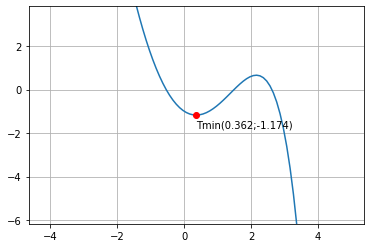

In [10]:
draw(x, y)

**Выводы :**

1.   Реализуя минимизацию методом квадратичной интерполяции , стало ясно , что этот способ достаточно быстро справляется со своей задачей - поиска минимума функции и полностью рабочий.
2.   Программа выполняет все нужные действия , которые требовались в задаче , а именно : строит графики функций, выдает найденную точку минимума и значение функции в ней и количество вычислений значений функции ( т.е кол-во итераций ) .
3. В итоге , привел примеры функций, для которых процесс а) сходится сверхлинейно ( 1 функция ) , сходится с линейной скоростью ( 3 функция ),  не сходится ( 2 функция)

